In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/MSFTPrices.csv'

stock_prices = pd.read_csv(path,parse_dates=['Date'])
stock_prices = stock_prices.sort_values(by='Date')

print(stock_prices.head())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


              Open    High     Low     Close    Volume   Adjusted   Returns
Date                                                                       
2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


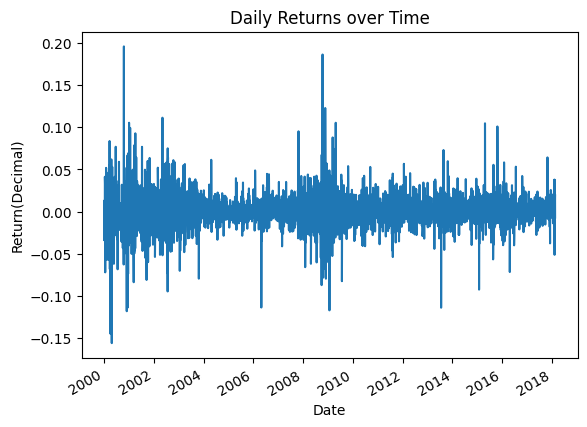

In [ ]:
stock_prices = stock_prices.set_index('Date')
stock_prices['Returns'] = stock_prices['Adjusted'].pct_change()

print(stock_prices.head())

stock_prices['Returns'].plot()
plt.title('Daily Returns over Time')
plt.ylabel('Return(Decimal)')
plt.show()



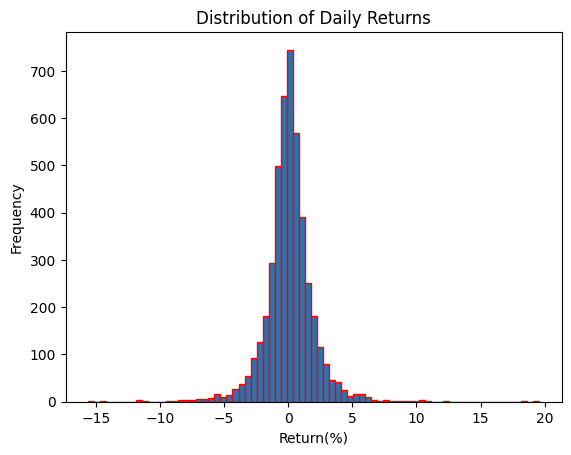

In [ ]:
percent_return = stock_prices['Returns']*100

returns_plot = percent_return.dropna()

plt.hist(returns_plot,bins=75,density=False, edgecolor='Red')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return(%)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_return_daily = np.mean(stock_prices['Returns'])
print(f'Mean Daily Return: {mean_return_daily}')

mean_return_annualized = ((1+mean_return_daily)**252)-1
print(f'Mean Annualized Return: {mean_return_annualized}')

Mean Daily Return: 0.00037777546435757676
Mean Annualized Return: 0.09985839482852632


In [ ]:
sigma_daily = np.std(stock_prices['Returns'])
print(f'Daily Standard Deviation: {sigma_daily}')

variance_daily = sigma_daily**2
print(f'Daily Variance: {variance_daily}')

Daily Standard Deviation: 0.019341100408708328
Daily Variance: 0.0003740781650197374


In [ ]:
sigma_annualized = sigma_daily*(252**0.5)
print(f'Annualized Standard Deviation: {sigma_annualized}')

variance_annualized = sigma_annualized**2
print(f'Annualized Variance: {variance_annualized}')

Annualized Standard Deviation: 0.3070304505826317
Annualized Variance: 0.09426769758497383


In [ ]:
from scipy.stats import skew

clean_returns = stock_prices['Returns'].dropna()

returns_skewness = skew(clean_returns)
print(f'Returns_skewness : {returns_skewness}')

Returns_skewness : 0.21935459193067805


In [ ]:
from scipy.stats import kurtosis

excess_kurtosis = kurtosis(clean_returns)
print(f'excess_kurtosis : {excess_kurtosis}')

fourth_moment = excess_kurtosis +3

print(f'fourth_moment : {fourth_moment}')

excess_kurtosis : 10.314572618025519
fourth_moment : 13.314572618025519


In [ ]:
from scipy.stats import shapiro

shapiro_result = shapiro(clean_returns)
print(f'shapiro_test : {shapiro_result}')

p_value = shapiro_result[1]
print(f'p_value : {p_value}')

shapiro_test : ShapiroResult(statistic=0.9003648428746107, pvalue=1.63104738942256e-47)
p_value : 1.63104738942256e-47


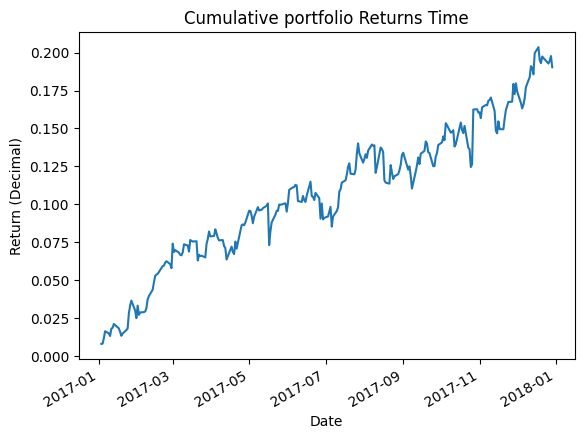

In [ ]:
Fpath_dsv = '/content/Big9Returns2017.csv'

StockReturns = pd.read_csv(Fpath_dsv,parse_dates=['Date']).set_index('Date')

portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

WeightedReturns = StockReturns.mul(portfolio_weights,axis=1)

StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)


CumumlativeReturns = ((1+StockReturns['Portfolio']).cumprod()-1)
CumumlativeReturns.plot()
plt.title('Cumulative portfolio Returns Time')
plt.ylabel('Return (Decimal)')
plt.show()

In [ ]:
def cumulative_returns_plot(returns,cols):
  CumumlativeReturns = ((1+returns[cols]).cumprod()-1)
  CumumlativeReturns.plot()
  plt.show()

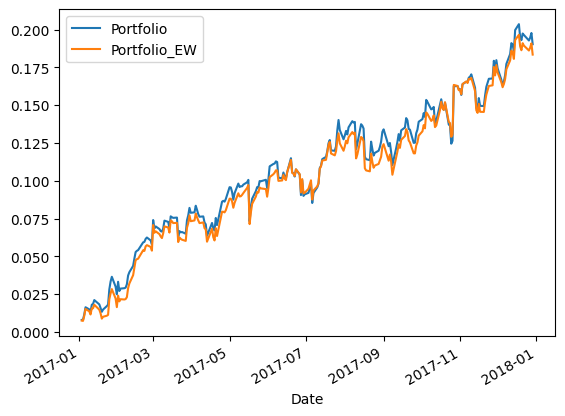

In [ ]:
numstocks = 9

portfolio_weights_ew = np.repeat(1/numstocks,numstocks)

StockReturns['Portfolio_EW'] = StockReturns.iloc[:, :numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

cumulative_returns_plot(StockReturns,['Portfolio','Portfolio_EW'])



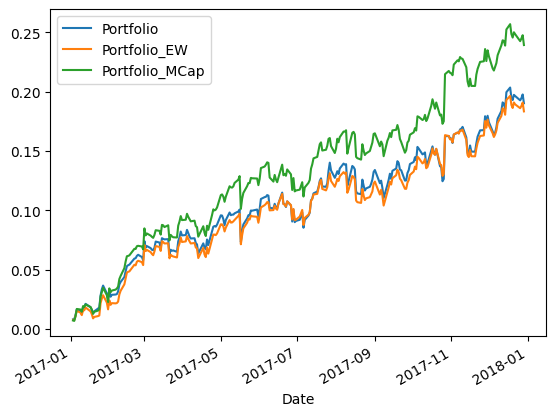

In [ ]:
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

mcap_weights = market_capitalizations / np.sum(market_capitalizations)

StockReturns['Portfolio_MCap'] = StockReturns.iloc[:,0:9].mul(mcap_weights,axis = 1).sum(axis=1)

cumulative_returns_plot(StockReturns,['Portfolio','Portfolio_EW','Portfolio_MCap'])

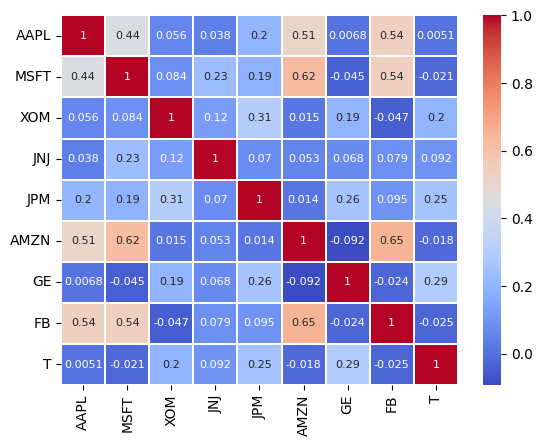

In [ ]:
import seaborn as sns

correlation_matrix = StockReturns.iloc[:,:9].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
           linewidths=0.3,
            annot_kws ={"size":8})


plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
cov_mat = StockReturns.iloc[:,:9].cov()

cov_mat_annual = cov_mat*252
print(cov_mat_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821  0.009849  
FB 

In [ ]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713793


In [ ]:
fpath_csv = '/content/EfficientFrontierPortfoliosSlim.csv'

RandomPortfolios = pd.read_csv(fpath_csv)

In [ ]:
risk_free = 0

RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns']-risk_free)/RandomPortfolios['Volatility']

print(RandomPortfolios['Sharpe'].describe()[['min','max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


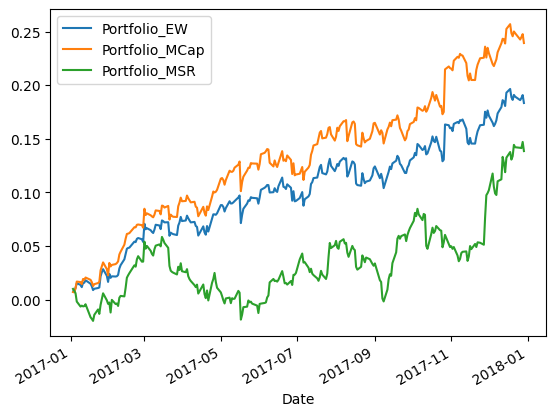

In [ ]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(StockReturns, ['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

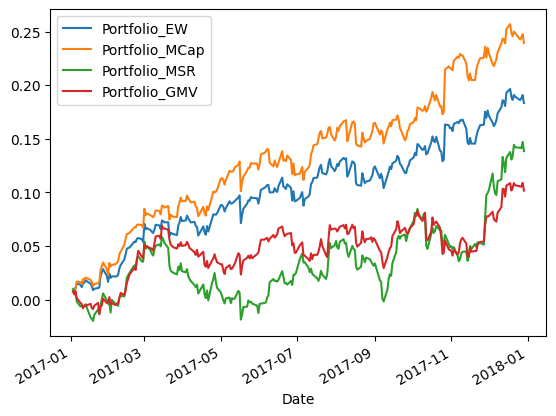

In [ ]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(StockReturns, ['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

In [31]:
fpath_csv = '/content/FamaFrenchFactors.csv'
FamaFrenchData = pd.read_csv(fpath_csv,parse_dates=['Date'],index_col='Date')

<Axes: xlabel='Date'>

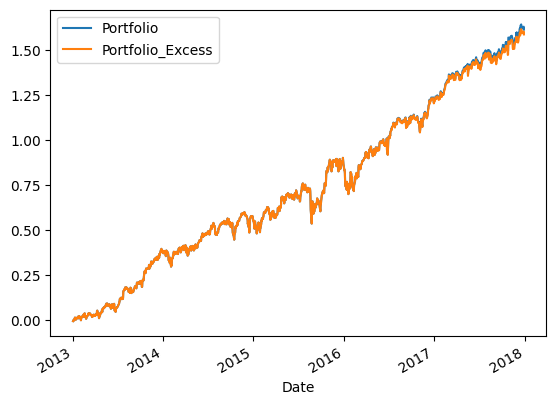

In [32]:
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

CumumlativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumumlativeReturns.plot()


In [33]:
covariance_matrix = FamaFrenchData[['Portfolio_Excess','Market_Excess']].cov()

covariance_coefficient = covariance_matrix.iloc[0,1]

print(covariance_coefficient)

benchmark_variance = FamaFrenchData['Market_Excess'].var()

print(benchmark_variance)

portfolio_beta = covariance_coefficient/benchmark_variance

print(portfolio_beta)

5.726126338154964e-05
5.8803350882118946e-05
0.9737755165745456


In [36]:
import statsmodels.formula.api as smf

CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

CAPM_fit = CAPM_model.fit()

print(CAPM_fit.rsquared_adj)

regression_beta = CAPM_fit.params['Market_Excess']

print(regression_beta)

0.7942627160017839
0.973775516574546


In [38]:
import statsmodels.formula.api as smf

FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

FamaFrench_fit = FamaFrench_model.fit()

regression_adj_rsq = FamaFrench_fit.rsquared_adj

print(regression_adj_rsq)





0.8193910088585152


In [40]:
smb_pval = FamaFrench_fit.pvalues['SMB']

if smb_pval < 0.05:
  significant_msg = 'Significant'
else:
  significant_msg = 'Not Significant'

smb_coeff = FamaFrench_fit.params['SMB']

print("The SMB Coefficient is ", smb_coeff,"and is ",significant_msg)

The SMB Coefficient is  -0.26215152743192643 and is  Significant


In [41]:
portfolio_alpha = FamaFrench_fit.params['Intercept']

print(portfolio_alpha)

portfolio_alpha_annual = portfolio_alpha*252 - 1

print(portfolio_alpha_annual)

0.0001832666520318303
-0.9538168036879787


In [43]:
import statsmodels.formula.api as smf

FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

FamaFrench5_fit = FamaFrench5_model.fit()

regression_adj_rsq = FamaFrench5_fit.rsquared_adj

print(regression_adj_rsq)

0.8367245019225793


In [44]:
fpath_csv = '/content/USO.csv'

uso = pd.read_csv(fpath_csv,parse_dates=['Date']).set_index('Date')

CUM_rets = (uso+1).cumprod()

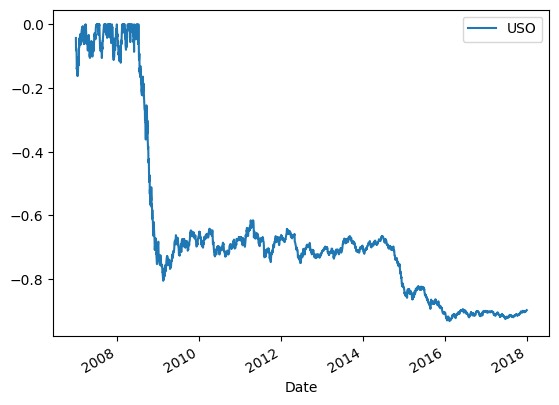

In [45]:
running_max = np.maximum.accumulate(CUM_rets)

running_max[running_max < 1] = 1

drawdown = (CUM_rets/running_max)-1

max_drawdown = drawdown.min()

drawdown.plot()
plt.show()


In [46]:
StockReturns_perc = uso['USO'] * 100



-3.608233764037496


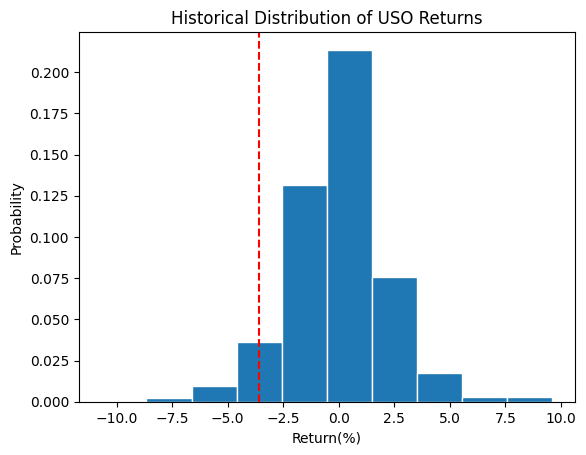

In [47]:
var_95 = np.percentile(StockReturns_perc, 100-95)
print(var_95)

sorted_rets = StockReturns_perc.sort_values()

plt.hist(sorted_rets,  density=True, stacked=True,edgecolor='White')

plt.title('Historical Distribution of USO Returns')

plt.ylabel('Probability')
plt.xlabel('Return(%)')

plt.axvline(x=var_95, color='r', linestyle='--',label="VaR 95:{0:.2f}%".format(var_95))

plt.show()




-5.054143158346777


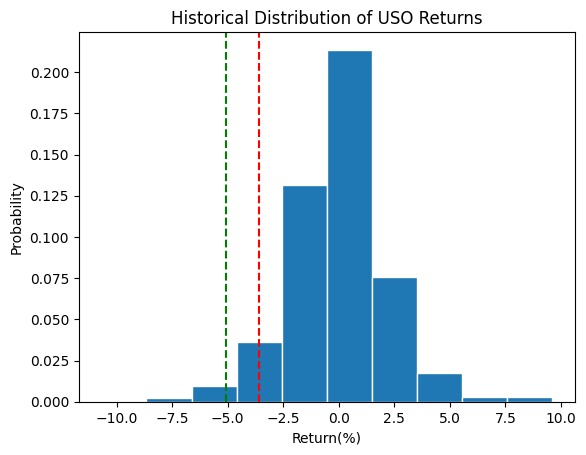

In [49]:
cvar_95 = np.mean(StockReturns_perc[StockReturns_perc < var_95])
print(cvar_95)

sorted_rets = sorted(StockReturns_perc)

plt.hist(sorted_rets , density = True , stacked = True , edgecolor = 'White')


plt.title('Historical Distribution of USO Returns')

plt.ylabel('Probability')
plt.xlabel('Return(%)')

plt.axvline(x=var_95, color='r', linestyle='--',label="VaR 95:{0:.2f}%".format(var_95))
plt.axvline(x=cvar_95, color='g', linestyle='--',label="CVaR 95:{0:.2f}%".format(cvar_95))

plt.show()

In [50]:
def plot_hist():
    plt.hist(sorted_rets, density=True, stacked=True)

    plt.xlabel('Returns (%)')
    plt.ylabel('Probability')
    plt.title('Historical Distribution of USO Returns', fontsize=18, fontweight='bold')
    plt.axvline(x=var_90, color='r', linestyle='-', label="VaR 90: {0:.2f}%".format(var_90))
    plt.axvline(x=var_95, color='g', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
    plt.axvline(x=var_99, color='b', linestyle='-', label="VaR 99: {0:.2f}%".format(var_99))
    plt.axvline(x=cvar_90, color='r', linestyle='--', label="CVaR 90: {0:.2f}%".format(cvar_90))
    plt.axvline(x=cvar_95, color='g', linestyle='--', label="CVaR 95: {0:.2f}%".format(cvar_95))
    plt.axvline(x=cvar_99, color='b', linestyle='--', label="CVaR 99: {0:.2f}%".format(cvar_99))
    plt.legend(loc='upper right')
    plt.show()

-2.558512646965176
-4.043186770518807


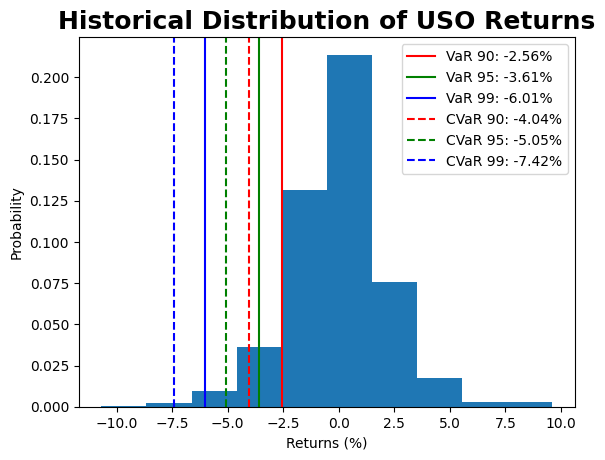

In [51]:
var_90 = np.percentile(StockReturns_perc, 100-90)
print(var_90)


cvar_90 = np.mean(StockReturns_perc[StockReturns_perc <= var_90])
print(cvar_90)


var_95 = np.percentile(StockReturns_perc , 100-95)
cvar_95 = np.mean(StockReturns_perc[StockReturns_perc <= var_95])

var_99 = np.percentile(StockReturns_perc , 100-99)
cvar_99 = np.mean(StockReturns_perc[StockReturns_perc <= var_99])

plot_hist()



In [53]:
from scipy.stats import norm

StockReturns = uso['USO']

mu = np.mean(StockReturns)

vol = np.std(StockReturns)

confidence_level = 0.05

var_95 = norm.ppf(confidence_level, mu, vol)

print('Mean:',str(mu),'\nVolatility:',str(vol),'\nVar(95):',str(var_95))

Mean: -0.00028638956240214787 
Volatility: 0.021888087129708873 
Var(95): -0.036289089064733646


In [54]:
def plot_var_scale():

    plt.plot(forecasted_values[:,0], -1*forecasted_values[:,1])
    plt.xlabel('Time Horizon T+i')
    plt.ylabel('Forecasted VaR 95 (%)')
    plt.title('VaR 95 Scaled by Time', fontsize=18, fontweight='bold')
    plt.show()

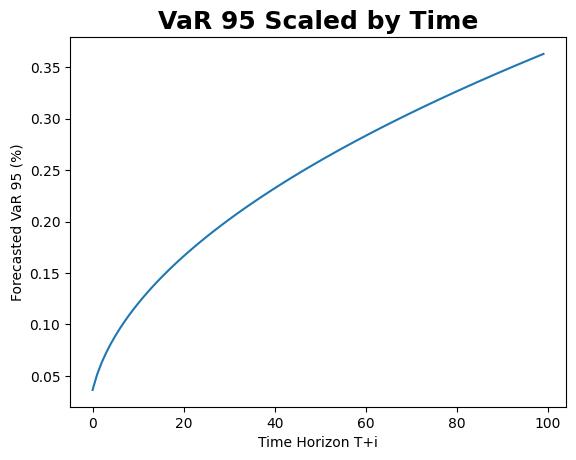

In [55]:
forecasted_values = np.empty([100,2])

for i in range(100):
  forecasted_values[i,0] = i
  forecasted_values[i,1] = var_95*np.sqrt(i+1)

plot_var_scale()

In [56]:
np.random.seed(123)

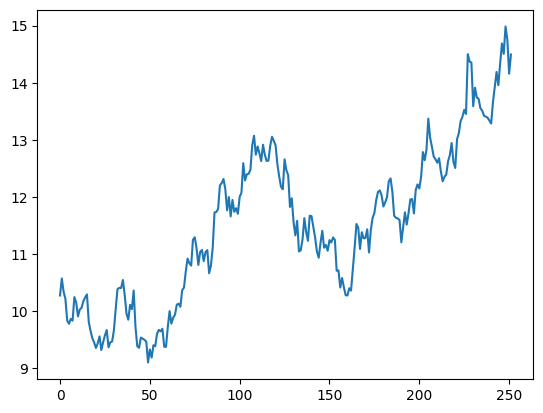

In [59]:
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252
S0 = 10

rand_rets = np.random.normal(mu,vol,T)+1

forecasted_values = S0 * rand_rets.cumprod()

plt.plot(range(0,T),forecasted_values)

plt.show()

In [60]:
np.random.seed(123)

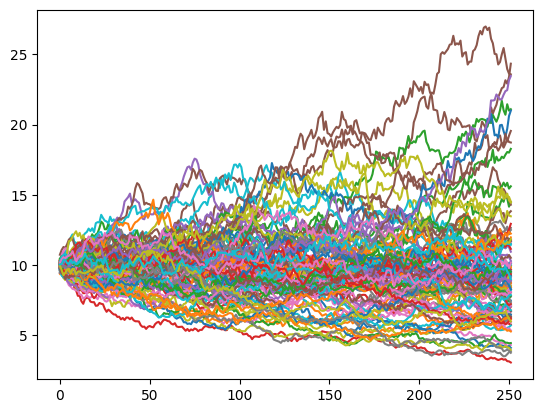

In [61]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1

    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()

    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [63]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)

    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 100-99)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.08 %
